#**Проект по Лингвистическому модулю**

##**Цель проекта**

**Тема проекта: Разработка алгоритма лемматизации глаголов в ненецком языке.**

Задачи: собрать данные, провести анализ морфологических особенностей языка и структуры глаголов, реализовать и протестировать разработанный алгоритм лемматизации.

##**Сбор данных**

Для составления набора использовались следующие источники:

*   [сообщество](https://vk.com/nn.yanao) общественно-политической национальной газеты Ямало-Ненецкого автономного округа "Няръяна Нгэрм" и [сообщество](https://vk.com/club173849556) газеты для носителей лесного диалекта ненецкого языка в социальной сети ВКонтакте;
*   [страница](http://www.yamalexpedition.ru/nen/blog-nen) дневниковых записей и [страница](http://www.yamalexpedition.ru/nen/education-for-nomads-nen) на тему кочевого образования на сайте этнографической экспедиции "Настоящие люди";
*   [сборник](https://libraries-yanao.ru/upload/iblock/289/Jangasova.pdf) ненецких сказок Янгасовой Н.М. 2007 года (Ненецие” лаханако”).

Программный код для сбора текста постов в социальной сети ВКонтакте на примере сообщества "Няръяна Нгэрм - старейшая газета Ямала"

```
import requests
import csv

access_token = 'API-key'
group_id = '147614552'
version = '5.131'

url = f'https://api.vk.com/method/wall.get?group_id=-{group_id}&access_token={access_token}&v={version}'

# отправление GET-запроса и получение JSON-объекта с данными
response = requests.get(url)
data = response.json()

if 'response' not in data:
    print(data['запрос не прошел успешно'])
else:
    # получение общего числа постов в группе
    count = data['response']['count']
    print(f'Количество постов: {count}')

    # получение всех постов на стене группы
    posts = []
    offset = 0
    while offset < count:
        url = f'https://api.vk.com/method/wall.get?group_id=-{group_id}&offset={offset}&count=100&access_token={access_token}&v={version}'
        response = requests.get(url)
        data = response.json()
        posts.extend(data['response']['items'])
        offset += 100

    print(f'Количество спарсенных постов: {len(posts)}')

    # сохранение данных в CSV-файл
    with open('nn_yanao_posts.csv', 'w', encoding='utf-8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['link', 'text'])
        for post in posts:
            post_link = f'https://vk.com/wall-{group_id}_{post["id"]}'
            post_text = post.get('text', '')

            # преобразование текстовых элементов в строку между ссылками на посты
            text_lines = post_text.split('\n')
            combined_text = ''
            for line in text_lines:
                if not line.startswith('http'):
                    combined_text += line.strip() + ' '

            writer.writerow([post_link, combined_text.strip()])

    print('Данные о постах сохранены в nn_yanao_posts.csv')

```

Данный код формирует файл в формате csv с названием "nn_yanao_posts" с разметкой столбцов 'link' и 'text' и записями, которые содержат текст преимущественно на ненецком языке в сообществе "Няръяна Нгэрм - старейшая газета Ямала". Записи могут не иметь текста (например, в том случае, если запись в социальной сети опубликована только с медиа-материалом, без текста) или иметь несколько абзацев в одной записи. Запись может содержать текст как полностью на ненецком языке, так и на русском.

Аналогичным способом с помощью VK API были собраны данные из другого сообщества газеты для носителей лесного диалекта ненецкого языка в файл nn_yanao_posts_2.csv.

Программный код для сбора текста в статьях сайта об этнографической экспедиции «Настоящие люди»

```
import requests
from bs4 import BeautifulSoup
import csv

url = "http://www.yamalexpedition.ru/nen/blog-nen/"

response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# нахождение всех элементов с классом "show-comment", содержащих ссылки на полные версии статей
links = soup.find_all("span", {"class": "show-comment"})

with open('articles_yamal_expedition.csv', 'w', encoding='utf-8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['link', 'title', 'text'])

    for link in links:
        # так как ссылки в html указаны без полного пути, ссылки модифицированы
        article_url = 'http://www.yamalexpedition.ru' + link.find("a")["href"]

        article_response = requests.get(article_url)
        article_soup = BeautifulSoup(article_response.text, "html.parser")

        article_title = article_soup.find('div', {'class': 'page-header'}).h1.text.strip()
        article_text = article_soup.find("div", {"itemprop": "articleBody"}).get_text(strip=True)

        writer.writerow([article_url, article_title, article_text])

```

Этот код формирует файл articles_yamal_expedition.csv с разметкой столбцов 'link', 'title' и 'text' и записями, которые содержат текст полностью на ненецком языке со страницы дневниковых записей на сайте этнографической экспедиции "Настоящие люди". Записи имеют единый стиль оформления текста в сравнении с текстами из постов в социальной сети. Например, можно заметить, что в тексте знаком ʼ (звонкой тасерʼʼ) передается придыхание. Этот звук встречается в словах ненецкого языка чрезвычайно часто после гласных и согласных в конце и середине слова. Таким образом, данный гортанный смычный звук изменяет ряд слов по значению. Двумя знаками ʼʼ (глухой тасерʼʼ) обозначается более сильное придыхание. В отличии от данного текста, содержимое в постах социальной сети имеют различное написание данных знаков. Вместо символа ’ в тексте иногда стоит ᾿ или '. Вместо двух символов ’ изредка используют " или ”.

Так же были собраны текстовые данные со страницы на тему кочевого образования с этого же сайта в файл формата csv с названием "articles_yamal_expedition_2".

Для сбора данных из печатного сборника ненецких сказок (Ненецие” лаханако”) было применено распознавание и пост-редактирование ненецкого и русского текста в OCR-редакторе ABBYY FineReader PDF 15. Затем эти данные были скопированы в txt-файл, где были обработаны и преобразованы различные символы для единого стиля документа (такие как гортанный смычный звук, тире, цифры, которые обозначали в сборнике ссылки, и другие символы, которые могли распознаться некорректно).

Таким образом, в файле nenets_tales_yangasova.txt было определено 4 столбца: название сказки на ненецком языке (title_nen) и русском (title_rus), содержание сказки на ненецком (tale_nen) и русском (tale_rus).

## **Исследование и предварительная обработка данных**

Были применены следующие действия с собранными данными:

1.  Конкатенация различных наборов данных, выбор и формирование столбца для решения задачи;
2.  Исключение русских слов из набора данных с помощью библиотеки pymorphy2;
3.  Очистка данных от специальных символов, кроме актуальных для ненецкого языка;
4.  Удаление эмодзи;
5.  Удаление дубликатов и пустых записей;
6.  Удаление записей с количеством слов меньше 5;
7.  Применение алгоритма стемминга существительных;
8.  Приведение всех символов, обозначающих гортанную смычку, к единому формату.

In [ ]:
import pandas as pd
import numpy as np
import csv

**Описание используемых наборов данных**

Для формирования корпуса было собрано 4 набора данных:

1.   nn_yanao_posts, 1915 записей, 2 столбца: link и text принимают значения ссылки на пост и текстового содержания преимущественно на ненецком языке в постах сообщества "Няръяна Нгэрм - старейшая газета Ямала" в социальной сети ВКонтакте;
2.   nn_yanao_posts_2, 409 записей, 2 столбца: link и text принимают аналогичные значения записей в сообществе газеты для носителей лесного диалекта ненецкого языка;
3.   articles_yamal_expedition, 37 записей, 3 столбца: link, title и text определяющие ссылку на статью, ее заголовок и текст со страницы дневниковых записей на сайте этнографической экспедиции "Настоящие люди";
4.   articles_yamal_expedition_2, 5 записей, 3 столбца: link, title и text обозначают идентичные данные со страницы на тему кочевого образования на сайте экспедиции;
5.   nenets_tales_yangasova.txt, 31 запись, 4 столбца: title_nen, title_rus,	tale_nen и tale_rus, содержащие название сказок на ненецком языке и русском и их содержание на ненецком и русском соответственно.

In [ ]:
col_names_posts = ['link', 'text']
col_names_articles = ['link', 'title', 'text']

df1 = pd.read_csv('nn_yanao_posts.csv', names=col_names_posts, sep=',')
df1.drop(index=df1.index[0], axis=0, inplace=True)

df2 = pd.read_csv('nn_yanao_posts_2.csv', names=col_names_posts, sep=',')
df2.drop(index=df2.index[0], axis=0, inplace=True)

df3 = pd.read_csv('articles_yamal_expedition.csv', names=col_names_articles,
                  sep=',')
df3.drop(index=df3.index[0], axis=0, inplace=True)

df4 = pd.read_csv('articles_yamal_expedition_2.csv', names=col_names_articles,
                  sep=',')
df4.drop(index=df4.index[0], axis=0, inplace=True)

In [ ]:
df_posts = pd.concat([df1, df2], axis=0)
df_posts.style

In [ ]:
df_articles = pd.concat([df3, df4], axis=0)

df_articles['text'] = df_articles.apply(lambda row: row['title'] + '. ' +
                                        row['text'], axis=1)
df_articles = df_articles.drop('title', axis=1)

df_articles.style

In [ ]:
# удаление идентификаторов постов и удаление наименований статей с сайта для
# круговой диаграммы
df_posts['link'] = df_posts['link'].apply(lambda x: re.sub(r'(_\d+)', '', x))
df_articles['link'] = df_articles['link'].apply(lambda x:
                                                '/'.join(x.split('/')[:5]))

In [ ]:
txt = 'nenets_tales_yangasova.txt'
csv_file = 'nenets_tales_yangasova.csv'
link_value = 'https://libraries-yanao.ru/upload/iblock/289/Jangasova.pdf'

with open(txt, 'r', encoding='utf-8') as f_txt, open(csv_file, 'w', encoding='utf-8', newline='') as f_csv:
    reader = f_txt.readlines()

    # cоздание объекта writer для записи в csv файл
    writer = csv.writer(f_csv, delimiter=',')
    writer.writerow(['link', 'title_nen', 'title_rus', 'tale_nen', 'tale_rus'])

    # определение и запись для каждой строки
    for i in range(0, len(reader), 4):
        title_nen = reader[i].strip()  # название сказки на ненецком языке
        tale_nen = reader[i+1].strip()  # текст сказки на ненецком языке
        title_rus = reader[i+2].strip()  # название сказки на русском языке
        tale_rus = reader[i+3].strip()  # текст сказки на русском языке
        writer.writerow([link_value, title_nen, title_rus, tale_nen, tale_rus])

In [ ]:
df_tales = pd.read_csv('nenets_tales_yangasova.csv', sep=',')
df_tales.drop(index=df_tales.index[0], axis=0, inplace=True)

df_tales['text'] = df_tales.apply(lambda row: row['title_nen'] + '. ' + row['tale_nen'], axis=1)

df_tales = df_tales.drop(['title_nen', 'title_rus', 'tale_nen', 'tale_rus'], axis=1)
df_tales.style

In [ ]:
df = pd.concat([df_posts, df_articles, df_tales], axis=0)

df['text'].fillna('', inplace=True)

df.to_csv('formed_data.csv', index=False)

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

def remove_russian_words(text):
    punctuation = ['.', ',', ';', '!', '?']
    tokens = text.split()
    filtered_tokens = [token for token in tokens
                       if not morph.parse(token)[0].is_known
                       and morph.parse(token)[0].tag.POS
                       or any(p in token for p in punctuation)]
    return ' '.join(filtered_tokens)

df['text'] = df['text'].apply(remove_russian_words)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    u"\U00002500-\U00002BEF"
    u"\U00002702-\U000027B0"
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    u"\U0001f926-\U0001f937"
    u"\U00010000-\U0010ffff"
    u"\u2640-\u2642"
    u"\u2600-\u2B55"
    u"\u200d"
    u"\u23cf"
    u"\u23e9"
    u"\u231a"
    u"\ufe0f"
    u"\u3030"
    "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', text)

df['text'] = df['text'].apply(remove_emoji)

In [ ]:
def remove_special_characters(text):
    # удаление переноса строк
    text = re.sub(r'\n', ' ', text)
    # удаление хэштегов
    text = re.sub(r'#\S+', ' ', text)
    # удаление текста в квадратных скобках (включительно)
    text = re.sub(r'\[.*?\]', ' ', text)
    # удаление последовательностей, начинающихся с цифры, за которой следует
    # дефис, и заканчивающуюся любыми не пробельными символами
    text = re.sub(r'\d+-\S+', ' ', text)
    # удаление аббревиатур на русском языке
    text = re.sub(r'\b[А-Я]+\b', ' ', text)

    return text.strip()

df['text'] = df['text'].apply(remove_special_characters)

In [ ]:
df['text'].drop_duplicates(inplace=True)
df['text'].replace('', np.nan, inplace=True)
df.dropna(subset=['text'], inplace=True)

In [ ]:
# удаление записей из набора данных, где количество слов меньше 5
df = df.loc[df['text'].apply(lambda x: len(x.split())) >= 5]

In [ ]:
def stemming_and_others_transformations(text):
    text = text.lower()
    # приведение всех символов, обозначающих гортанную смычку, к единому формату
    text = re.sub(r'(?<=[а-яёӓԓӈ])\'(?=\s)|(?<=[а-яёӓԓӈ])\'(?=[а-яёӓԓӈ])',
                  '’', text)
    text = re.sub(r'(?<=[а-яёӓԓӈ])\᾿(?=\s)|(?<=[а-яёӓԓӈ])\᾿(?=[а-яёӓԓӈ])',
                  '’', text)
    text = re.sub(r'(?<=[а-яёӓԓӈ])"(?=\s)|(?<=[а-яёӓԓӈ])"(?=[а-яёӓԓӈ])',
                  '”', text)
    text = re.sub(r'(?<=[а-яёӓԓӈ])\'\'(?=\s)|(?<=[а-яёӓԓӈ])\'\'(?=[а-яёӓԓӈ])',
                  '”', text)
    # удаление символов, которые не изменились с помощью выражений выше
    text = text.replace("'", "").replace("᾿", "").replace('"', "")
    # преобразование существительных в именительной и родительной (всего падежей в ненецком языке 7: именительной, родительной, винительной, дательной, творительной, отложительной, продольный)
    text = re.sub(r'(?<=[а-яёӓԓӈ])м’(?=\s)|(?<=[а-яёӓԓӈ])н’(?=\s)|(?<=[а-яёӓԓӈ])хана(?=\s)|(?<=[а-яёӓԓӈ])хад(?=\s)|(?<=[а-яёӓԓӈ])вна(?=\s)',
                  '', text)
    # преобразование неодушевленных существительных в именительной и родительной
    text = re.sub(r'(?<=[а-яёӓԓӈ])хэна(?=\s)|(?<=[а-яёӓԓӈ])хэд(?=\s)|(?<=[а-яёӓԓӈ])ӈгана(?=\s)|(?<=[а-яёӓԓӈ])ӈгад(?=\s)|(?<=[а-яёӓԓӈ])т’(?=\s)|(?<=[а-яёӓԓӈ])кана(?=\s)|(?<=[а-яёӓԓӈ])кад(?=\s)|(?<=[а-яёӓԓӈ])увна(?=\s)',
                  '', text)
    # удаление послелогов
    #re.sub(r'ни\’|ниня|нимня|мю\’|мюня|мюд|мюмня|ерня\’|ерняна|ерняд|ернямна',
    #'', text)

    return text.strip()

df['text'] = df['text'].apply(stemming_and_others_transformations)

In [ ]:
df['text'].to_csv('prepared_data.csv', index=False)
df_link = df['link']
df.shape

(1515, 2)

In [ ]:
df = pd.read_csv('prepared_data.csv')
df.style

,text
0,"апреля. 14.30 «ямал-потомкам!», яунгад . . (где читаете, новое, фотографии, рисунки!) если газетой, «рабочие фотографии фото (где сделано, самые «няръяна количество ограничено, то, период; няръяна ӈэрм «ямал-потомкам!» няръяна ӈэрм «ямал-потомкам!» няръяна ӈэрм «ямал-потомкам!» ."
1,"нерняӈы е’’эмня ниць яля ерв, янда лаханась. пудана самляӈг манзара’’мида ваде’’ӈась. нюртей вадада нямна ӈась. пыда таӈга иле’’, хусувэй нямна ибедорӈава’’. мэнаӈэ сиддо’, таддика сямян ӈамгэ серо’’ӈа’’. ӈаха’’на мэ’’. ӈадьбята нядабина’’. ханаць пир’’ма; таӈы тидхалембава; салдамбава; няби манзарава; няби ня’’марпава. ӈокханда пир». таславы серода таня’’, намдыдонзь. ненадо ваде’’мыда нямна ӈаць. мядо мимбава мяка’’на илелтыд’’. пудана самляӈг похона едэй ямдавыд’’. сехэры’’, ӈокханда сулормы’’. похона сулорць тасламби’’. уренгой едэй тиртя ӈамдолава ӈадимясь. нядаӈгарда няби саляӈгарда ӈэда сулорта’’. тиӈгэ ӈадимы’’. похона кутопьюган няби шурышкары сертаӈгу’’. манзая едэй мядо мимбаӈгу’’. лекараха’’на ӈаво тэвраӈгу’’. яхат ханда’’. ӈадимда’’, тэворма нензелмда. хаӈгурма е’’эмня едэй ӈадимда’’. хусувэй нядабаӈгу’’. тохолкось ё’’, хусувэй илена ӈэбта тара. ӈадьбята е’’эмня сямян сертаби’’. спортм’, тохолковам’, сенз няби минреӈгу’’, тика минда. серкат лэтрева марка’’на няд’’мяць поӈгым’, пихий маниеӈгу’’. тирта мутра нядмята’’. ӈадимда’’. тиӈгэ тарця харад си’’ив, тамна нэӈгу’’. юрыбю’’. миваць. сензӈэ, таӈга е’’эмня таняӈгу. саць ненадумдавэда «ямал-100». похона поданда ханда. тикы ӈока серта тасламби’’. ӈарка ненадо яляӈэ толёда. савари е’’эмня мэта’’. няби ӈарка мэтӈаха’. хуркари мядо, тохолкось ё, илесь мядо сертаӈгу’’. нямэ табековысь. минрена ӈэдаравы. няна серо’’ӈа. ӈадьбята яӈга ӈадимдеӈгу’’. вада тохолкодаха’’на тарця тараӈгу’’. нянда инзеле’’ма терӈэ нерняӈы нямна ӈылмна таӈгава’’. тарця таняб’’, минаць минда."
2,"[id674322462|тимофей няби [id234567255|владимир турӈаханзь. тэвравэхэнзь. лаптандер товэсь. сертавы [club147614552|няръяна нгэрм манэсарӈаць. нисянда манэ’’ӈа. нисянда паривич худи. пыда вымна мюсерта ненэць’. нэкович няби нено сертавы хоӈаханзь. тамальӈгы тензибтеӈаханзь. ти, тадта’’мамда’’, теневана манэць пир’’ӈада’’."
3,"яля. няръяна газета манзарана соя”ма яля. ниня нянд хэтабина”. сергеевна, сензан ӈа”, падыбадид хан”ӈая”. манзаямд минред”! [club147614552|няръяна нгэрм собрания ненадо падро ня”маць."
4,"округу, хабэчей хываревичем яунгад годы. людей, узнали."
5,"хуняна тэволана, ненадо яля. няби турӈаць. едэй сертабиць."
6,мэбете”э яптик няби окотэтто [club147614552|няръяна нгэрм
7,"«няръяна корреспондент. образование; (тундровым языками; приветствуется. видеосъёмки. работе. excel, nn-ynao@yandex.ru"
8,"яля мере”ӈая! ниць яля вы сертавы. тохоламби. сямянхат мерета намдаӈгува. [club147614552|няръяна нгэрм толабида, тика вадетава."
9,"сея тецьда, я”авла пэрӈа. тамна то”олха. тованда ӈэдакы. [club147614552|няръяна нгэрм сидяӈг манэ”ӈада, помна ӈада."


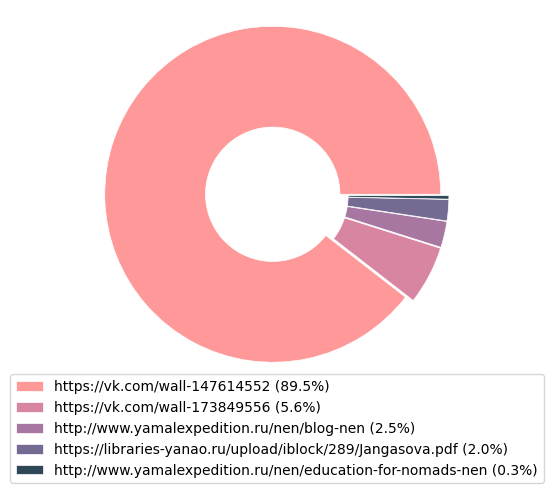

In [ ]:
import matplotlib.pyplot as plt

# подсчет количества ссылок в каждом источнике
counts = df_link.value_counts()

colors = ['#FF9999', '#D885A2', '#A777A1', '#756A92', '#2F4858']
explode = [0.025] * len(counts)

# построение круговой диаграммы
plt.pie(counts.values, labels=None, colors=colors, explode=explode,
        wedgeprops={'linewidth': 0.5, 'edgecolor': 'white', 'width': 0.6})

# добавление легенды с процентным соотношением
legend_labels = [f'{label} ({count/sum(counts)*100:.1f}%)' for label, count in zip(counts.index, counts.values)]
plt.legend(legend_labels, loc="lower center", bbox_to_anchor=(0.5, -0.3))

# удаление надписи на самом графике
plt.gca().set_title('')

plt.axis('equal')
plt.show()

**Описание сформированного и предварительно обработанного корпуса**

Предварительно обработанный корпус текста имеет 1515 записи и 2 столбца: link (ссылка на источник) и text (пост в социальной сети, статья на сайте или сказка), где может содержаться предложение, абзац или несколько абзацев текста.

## **Разработка алгоритма лемматизации глаголов в ненецком языке**


In [ ]:
import re

suffixes = {
    'II_dual_plur': {
        'past_plural': {
            '1': 'наць',
            '1': 'ӈахаюнаць',
            '2/3': 'даць',
            '2/3': 'ӈахаюдаць',
            '3': 'донзь',
            '3': 'ӈахаюдонзь',
        },
        'past_dual': {
            '1': 'нинзь',
            '1': 'ӈахаюнинзь',
            '2/3': 'ӈахаюдинзь',
            '2/3': 'ӈахаюдинзь',
        },
        'past_singular': {
            '1/2': 'нась',
            '1/2': 'ӈахаюнась',
            '2/3': 'дась',
            '2/3': 'ӈахаюдась',
        },
        'present_plural': {
            '1': 'на’',
            '1': 'ӈахаюна’',
            '2/3': 'да’',
            '2/3': 'ӈахаюда’',
            '3': 'до’',
            '3': 'ӈахаюдо’',
        },
        'present_dual': {
            '1': 'ни’',
            '1': 'ӈахаюни’',
            '2/3': 'ди’',
            '2/3': 'ӈахаюди’',
        },
        'present_singular': {
            '1/2': 'н',
            '1/2': 'ӈахаюн',
            '2': 'д',
            '2': 'ӈахаюд',
            '2/3': 'да',
            '2/3': 'ӈахаюда',
        },
    },
    'II_sing_obj': {
        'past_plural': {
            '1': 'ваць',
            '2': 'раць',
            '3': 'донзь',
        },
        'past_dual': {
            '1': 'минзь',
            '2': 'ринзь',
            '2/3': 'динзь',
        },
        'past_singular': {
            '1': 'вась',
            '2': 'рась',
            '2/3': 'дась',
        },
        'present_plural': {
            '1': 'ва’',
            '2': 'ра’',
            '3': 'до’',
        },
        'present_dual': {
            '1': 'ми’',
            '2': 'ри’',
            '2/3': 'ди’',
        },
        'present_singular': {
            '1': 'в',
            '2': 'р',
            '2/3': 'да',
        },
    },
    'III': {
        'past_plural': {
            '1': 'наць',
            '2/3': 'даць',
            '2/3': 'даць',
        },
        'past_dual': {
            '1': 'нинзь',
            '2/3': 'динзь',
            '3': r'хынзь',
        },
        'past_singular': {
            '1': 'ваць',
            '1/2': 'нась',
            '3': 'ць',
        },
        'present_plural': {
            '1': 'на’',
            '2/3': 'да’',
            '3': 'д’',
        },
        'present_dual': {
            '1': 'ни’',
            '2/3': 'ди’',
            '3': 'хы’',
        },
        'present_singular': {
            '1': 'в’',
            '2': 'н’',
            # '3': '’',
        },
    },
    'I': {

        'past_plural': {
            '1': 'ва’',
            '2': 'да’',
            # '3': '’',
        },
        'past_dual': {
            '1': 'нинзь',
            '2/3': 'динзь’',
            '3': (r'ханзь', 'ӈаханзь'),
        },
        'past_singular': {
            '1': ('дамзь', 'манзь'),
            '1/2': 'нась',
            '3': 'сь',
        },
        'present_dual': {
            '1': 'ни’',
            '2/3': 'ди’',
            '3': ('ӈаха’', r'ха’'),
        },
        'present_singular': {
            '1': 'м',
            '1': 'дм',
            '1/2': 'н',
        },
        'present_plural': {
            '1': 'ва’',
            '2': 'да’',
            '3': '’',
        },
    },
}

In [ ]:
def find_suffix(word, suffixes):
    suffix_type = None
    tense = None
    person = None
    found_suffix = None

    for suffix_type, suffix_data in suffixes.items():
        for tense, suffixes_by_tense in suffix_data.items():
            for person, suffix in suffixes_by_tense.items():
                if isinstance(suffix, tuple):
                    for s in suffix:
                        if word.endswith(s):
                            found_suffix = s
                            break
                else:
                    if isinstance(suffix, str) and word.endswith(suffix):
                        found_suffix = suffix
                        break

                if found_suffix:
                    break
            if found_suffix:
                break
        if found_suffix:
            break

    return suffix_type, tense, person, found_suffix

def format_tense(tense):
    if tense == "present_singular":
        return "Время: Неопределенное\nЧисло: Единственное"
    elif tense == "present_dual":
        return "Время: Неопределенное\nЧисло: Двойственное"
    elif tense == "present_plural":
        return "Время: Неопределенное\nЧисло: Множественное"
    elif tense == "past_singular":
        return "Время: Прошедшее\nЧисло: Единственное"
    elif tense == "past_dual":
        return "Время: Прошедшее\nЧисло: Двойственное"
    elif tense == "past_plural":
        return "Время: Прошедшее\nЧисло: Множественное"
    else:
        return "Error"

def check_and_replace_endings(word):
    replacements = {"хаю": "",
        "у": "о",
        "ю": "ё",

        # "в": "м",
        # "й": "н",
    }

    if word and word[-1] in replacements:
        word = word[:-1] + replacements[word[-1]]

    return word

In [ ]:
words = ['манзарадм',
    'манзаран',
    'манзара',
    'манзарани’',
    'манзаради’',
    'манзараӈаха’',
    'манзарава’',
    'манзарада’',
    'манзара’',
    'манзарадамзь',
    'манзаранась',
    'манзарась',
    'манзаранинзь',
    'манзарадинзь',
    'манзараханзь',
    'манзараваць',
    'манзарадаць',
    'манзараць',
    'ханав',
    'ханар',
    'ханада',
    'ханами’',
    'ханари’',
    'ханади’',
    'ханава’',
    'ханара’',
    'ханадо’',
    'ханавась',
    'ханарась',
    'ханадась',
    'ханаминзь',
    'ханаринзь',
    'ханадинзь',
    'ханаваць',
    'ханараць',
    'ханадонзь',
    'ханаӈахаюн',
    'ханаӈахаюд',
    'ханаӈахаюда',
    'ханаӈахаюни’',
    'ханаӈахаюди’',
    'ханаӈахаюди’',
    'ханаӈахаюна’',
    'ханаӈахаюда’',
    'ханаӈахаюдо’',
    'ханаӈахаюнась',
    'ханаӈахаюдась',
    'ханаӈахаюдась',
    'ханаӈахаюнинзь',
    'ханаӈахаюдинзь',
    'ханаӈахаюдинзь',
    'ханаӈахаюнаць',
    'ханаӈахаюдаць',
    'ханаӈахаюдонзь',
    'тарпыв’',
    'тарпын’',
    'тарпы’',
    'тарпыни’',
    'тарпыди’',
    'тарпыхы’',
    'тарпына’',
    'тарпыда’',
    'тарпыд’',
    'тарпываць',
    'тарпынась',
    'тарпыць',
    'тарпынинзь',
    'тарпыдинзь',
    'тарпыхынзь',
    'тарпынаць',
    'тарпыдаць',
    'тарпыдаць',
    'яӈгудм',]

for word in words:
    result = find_suffix(word, suffixes)
    if result:
        suffix_type, tense, person, suffix = result
        if suffix is not None:
            suffix_length = len(suffix)
            print(f"Слово без суффикса: {word[:-suffix_length]}")
            #print(f"Тип спряжения: {suffix_type}")
            print(f"{format_tense(tense)}")
            print(f"Лицо: {person}")
            print(f"Суффикс: {suffix}")
            print(f"Лемма: {check_and_replace_endings(word[:-suffix_length])}")
        else:
            print(f"Слово: {word}")
            print("Похоже, это основа глагола.\nОна может использоваться в ед. числе в 3-м лице (I тип спряжения)")
        print('-----------------------------------------------------------------')
    else:
        print("Error")

Слово без суффикса: манзара
Время: Неопределенное
Число: Единственное
Лицо: 1
Суффикс: дм
Лемма: манзара
-----------------------------------------------------------------
Слово без суффикса: манзара
Время: Неопределенное
Число: Единственное
Лицо: 1/2
Суффикс: н
Лемма: манзара
-----------------------------------------------------------------
Слово: манзара
Похоже, это основа глагола.
Она может использоваться в ед. числе в 3-м лице (I тип спряжения)
-----------------------------------------------------------------
Слово без суффикса: манзара
Время: Неопределенное
Число: Двойственное
Лицо: 1
Суффикс: ни’
Лемма: манзара
-----------------------------------------------------------------
Слово без суффикса: манзара
Время: Неопределенное
Число: Двойственное
Лицо: 2/3
Суффикс: ди’
Лемма: манзара
-----------------------------------------------------------------
Слово без суффикса: манзара
Время: Неопределенное
Число: Двойственное
Лицо: 3
Суффикс: ӈаха’
Лемма: манзара
----------------------------

In [ ]:
def lemmatize_word(word):
    result = find_suffix(word, suffixes)
    if result:
        suffix_type, tense, person, suffix = result
        if suffix is not None:
            suffix_length = len(suffix)
            base_word = check_and_replace_endings(word[:-suffix_length])
            return base_word
        else:
            return word
    else:
        return "Error"

def lemmatize_text(text):
    words = text.split()  # разделение текста на отдельные слова
    lemmatized_words = [lemmatize_word(word) for word in words]
    return ' '.join(lemmatized_words)  # объединение лемматизированных слов

# применение функции к столбцу 'text' и запись результатов в новый столбец 'base_word'
df['base_word'] = df['text'].apply(lemmatize_text)

In [ ]:
df.style